<h1> Research Question
    
<h5> Through exploring population demographics, twitter sentiments, and gun incident rates in Illinois and Texas we aim to learn if the political environment instigates higher gun related incidents and what socioeconomic elements may simultaneously  contribute. Our guiding questions are (1) In what ways do Twitter sentiments and Twitter interactions during election years contribute to the magnitude of gun-related incidents in the US? (2) Is there an increase in gun incidents during election years? (3)How may socioeconomic status contribute?

<h5>Accidental Deaths Data- This data set is about gun related deaths, in the US between the years 2014 to 2016. The data allows me to explore the number of deaths in a given city/county in each state. 
Authored By: Stacy Carlos

<h1> Importing Data

<h5> Here I import my data set file,"accidental_deaths.csv - Sheet1.csv" by using geopandas to import it. I then assign it to the variable "gvd" in order to reference to it more easily and I will know its my gun violence data. I also import import plotly.express for the data visualizations I will make in the Plotting section.

In [70]:
import geopandas as gpd
import plotly.express as px

In [71]:
gvd = gpd.read_file('accidental_deaths.csv - Sheet1.csv')

<h1> Data Exploration

<h5> In this part I am going to explore the accidental death data set and learn about the data I am working with

By adding the command .head to gvd it will output the first five rows of the data set, starting from 0 to 4.   

In [72]:
gvd.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,geometry
0,"November 26, 2016",Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,N/A,None
1,"November 26, 2016",Ohio,Grand Rapids,SR Route 65,1,0,N/A,None
2,"November 24, 2016",New York,Sandy Creek,Kehoe Road,1,0,N/A,None
3,"November 24, 2016",Florida,Black Point,N/A,1,0,N/A,None
4,"November 23, 2016",Michigan,Powell Township,North 1311 County Road KCI,1,0,N/A,None


I now know what columns I am working with, but more specifically what order it is organized in and the categories. 

The command .shape outputs the amount of rows and columns in the whole dataset imported. SO here there are 500 rows and 8 columns. this allows me to know exactly how large my data is and have an idea of what quantity I will work with.

In [73]:
gvd.shape

(500, 8)

By using the command .info on gvd you can output essentially a summary of the data set. This allows me to all get an overview of my data and whow what kind of data it is that my data set is comprised and organized into. What is output here is the first and last 5 rows of each column. 

In [74]:
gvd.info

<bound method DataFrame.info of          Incident Date     State   City Or County  \
0    November 26, 2016  Maryland    Sabillasville   
1    November 26, 2016      Ohio     Grand Rapids   
2    November 24, 2016  New York      Sandy Creek   
3    November 24, 2016   Florida      Black Point   
4    November 23, 2016  Michigan  Powell Township   
..                 ...       ...              ...   
495   October 18, 2015  Illinois        Effingham   
496   October 17, 2015      Ohio          Pandora   
497   October 17, 2015   Georgia           Dallas   
498   October 17, 2015  Illinois          Chicago   
499   October 17, 2015     Idaho         Meridian   

                                    Address # Killed # Injured Operations  \
0    6600 block of Eylers Valley Flint Road        1         0        N/A   
1                               SR Route 65        1         0        N/A   
2                                Kehoe Road        1         0        N/A   
3                      

given that I am more interested in Texas I will conduct a query for that state. And here are the rows that have texas as a state

In [75]:
gvd.query("State == 'Texas'")

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,geometry
67,"October 7, 2016",Texas,Houston,Long Point Road and Oak Tree Drive,1,0,N/A,None
77,"September 29, 2016",Texas,Fort Worth,3712 North Elm Street,1,0,N/A,None
85,"September 24, 2016",Texas,Houston,4439 Pease Street,1,0,N/A,None
93,"September 14, 2016",Texas,Bexar (county),N/A,1,0,N/A,None
94,"September 13, 2016",Texas,Azle,400 block of Rider Lane,1,0,N/A,None
100,"September 5, 2016",Texas,Rockdale,900 block of CR 319,1,0,N/A,None
101,"September 5, 2016",Texas,San Benito,200 block of Los Ranchitos,1,0,N/A,None
109,"August 28, 2016",Texas,Ivanhoe,N/A,1,0,N/A,None
110,"August 27, 2016",Texas,San Benito,500 block of Doherty Street,1,0,N/A,None
114,"August 19, 2016",Texas,La Porte,9700 block of Wilmont Road.,1,0,N/A,None


I now create a new variable that contains all the information on that query. 

In [76]:
texas_deaths= gvd.query("State == 'Texas'").copy()

using the command .shape, again, I want to see the amount of rows and columns in texas_deaths. SO here there are 48 rows and 8 columns. this allows me to know exactly how large my data is and have an idea of what quantity I will work with.

In [77]:
texas_deaths.shape

(45, 8)

by using the braces I am able to pull only values from the City Or County column from the texas_deaths data set but when you add the .value_count() to the texas_deaths['City Or County'] the output will be how many instances (or value counts) there are for each value. As a result, what is returned is the number of seperate mass shooting incidents have occurred in each City Or County over the duration of the three years. 

In [78]:
texas_deaths['City Or County'].value_counts()

Houston             7
San Antonio         6
Dallas              2
San Benito          2
Rockdale            1
La Porte            1
Burnet              1
Cypress             1
Webb (county)       1
Donna               1
Lubbock             1
Henderson           1
Azle                1
Marion (county)     1
Bridgeport          1
Mineral Wells       1
Fort Worth          1
Ivanhoe             1
Alvin               1
Waxahachie          1
Greenville          1
Ennis               1
Liberty (county)    1
Bexar (county)      1
Palestine           1
Paris               1
Universal City      1
Katy                1
El Indio            1
Beaumont            1
Baytown             1
Corpus Christi      1
Name: City Or County, dtype: int64

now I am going to do the same thing for the other state in our project, Illinois!

In [79]:
gvd.query("State == 'Illinois'")

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,geometry
61,"October 13, 2016",Illinois,Waukegan,1100 block of Greenfield Avenue,1,0,N/A,None
134,"August 5, 2016",Illinois,Chicago,2700 block of West Evergreen Avenue,1,0,N/A,None
209,"June 3, 2016",Illinois,Chicago,3500 block of South Parnell Avenue,1,0,N/A,None
221,"May 20, 2016",Illinois,Barry,186 E 2700th St,1,0,N/A,None
267,"March 27, 2016",Illinois,Carbondale,402 West Walnut Street,1,1,N/A,None
273,"March 20, 2016",Illinois,Chicago,4900 block of Aster Street,1,0,N/A,None
275,"March 20, 2016",Illinois,Chicago (Englewood),6700 block of S. Aberdeen St.,1,0,N/A,None
320,"February 17, 2016",Illinois,Chicago,7800 block of South Honore,1,0,N/A,None
383,"January 8, 2016",Illinois,Morris,2400 block of Oakland Circle,1,0,N/A,None
419,"December 17, 2015",Illinois,Belleville,1800 block of Dalton Dr,1,0,N/A,None


I now create a new variable that contains all the information on that query. 

In [80]:
illinois_deaths= gvd.query("State == 'Illinois'").copy()

using the command .shape, again, I want to see the amount of rows and columns in illinois_deaths. SO here there are 16 rows and 8 columns. this allows me to know exactly how large my data is and have an idea of what quantity I will work with.

In [81]:
illinois_deaths.shape

(16, 8)

by using the braces I am able to pull only values from the City Or County column from the illinois_deaths data set but when you add the .value_count() to the illinois_deaths['City Or County'] the output will be how many instances (or value counts) there are for each value. As a result, what is returned is the number of seperate mass shooting incidents have occurred in each City Or County over the duration of the three years.

In [82]:
illinois_deaths['City Or County'].value_counts()

Chicago                5
Carbondale             1
Waukegan               1
Belleville             1
Barry                  1
Morris                 1
Hoffman Estates        1
Effingham              1
Chicago (Englewood)    1
Champaign              1
Decatur                1
Aurora                 1
Name: City Or County, dtype: int64

<h1> Plotting

Here I am going to create a variable that will comprise of the City or County value counts titled "texasStateCount" and "illinoisStateCount," respectively, so as to condense it and make the variables contain a series that can later be converted. I then output each new variable to demonstrate/verify that is what happened. 

In [83]:
texasStateCount = texas_deaths['City Or County'].value_counts()
texasStateCount

Houston             7
San Antonio         6
Dallas              2
San Benito          2
Rockdale            1
La Porte            1
Burnet              1
Cypress             1
Webb (county)       1
Donna               1
Lubbock             1
Henderson           1
Azle                1
Marion (county)     1
Bridgeport          1
Mineral Wells       1
Fort Worth          1
Ivanhoe             1
Alvin               1
Waxahachie          1
Greenville          1
Ennis               1
Liberty (county)    1
Bexar (county)      1
Palestine           1
Paris               1
Universal City      1
Katy                1
El Indio            1
Beaumont            1
Baytown             1
Corpus Christi      1
Name: City Or County, dtype: int64

In [84]:
illinoisStateCount = illinois_deaths['City Or County'].value_counts()
illinoisStateCount

Chicago                5
Carbondale             1
Waukegan               1
Belleville             1
Barry                  1
Morris                 1
Hoffman Estates        1
Effingham              1
Chicago (Englewood)    1
Champaign              1
Decatur                1
Aurora                 1
Name: City Or County, dtype: int64

I will now convert the series into a dataframe by using ".reset_index()" what is then output is that dataframe of the the City Or County and the number of counts. Here I do it for both states

In [85]:
texasStateCount = texasStateCount.reset_index()
texasStateCount

,index,City Or County
0,Houston,7
1,San Antonio,6
2,Dallas,2
3,San Benito,2
4,Rockdale,1
5,La Porte,1
6,Burnet,1
7,Cypress,1
8,Webb (county),1
9,Donna,1


In [86]:
illinoisStateCount = illinoisStateCount.reset_index()
illinoisStateCount

,index,City Or County
0,Chicago,5
1,Carbondale,1
2,Waukegan,1
3,Belleville,1
4,Barry,1
5,Morris,1
6,Hoffman Estates,1
7,Effingham,1
8,Chicago (Englewood),1
9,Champaign,1


the columns are incorrectly labled so I am going to make each into a list to then rename 

In [87]:
texasStateCount.columns.to_list()

['index', 'City Or County']

In [88]:
illinoisStateCount.columns.to_list()

['index', 'City Or County']

I am going to renaming the colums by changing the labels/names in the list. The list is then outputted with the correct labels I want the columns to have, as seen in the modified table

In [89]:
texasStateCount.columns = ['City or County', 'Count']
texasStateCount

,City or County,Count
0,Houston,7
1,San Antonio,6
2,Dallas,2
3,San Benito,2
4,Rockdale,1
5,La Porte,1
6,Burnet,1
7,Cypress,1
8,Webb (county),1
9,Donna,1


In [90]:
illinoisStateCount.columns = ['City or County', 'Count']
illinoisStateCount

,City or County,Count
0,Chicago,5
1,Carbondale,1
2,Waukegan,1
3,Belleville,1
4,Barry,1
5,Morris,1
6,Hoffman Estates,1
7,Effingham,1
8,Chicago (Englewood),1
9,Champaign,1


now I am going to construct bar charts for each states death count per city/county. I add arguments to clarify what I want the x and y axis to be. I also add an argument for colors to be applied on each city/county (which added a color coded legend), and then another for the titles. I do this for both states!

In [91]:
px.bar(texasStateCount,
       x = 'Count',
       y = 'City or County',
       color = 'City or County',
       title = 'Number of Deaths Per City/County in Texas '
      )

In [92]:
px.bar(illinoisStateCount,
       x = 'Count',
       y = 'City or County',
       color = 'City or County',
       title = 'Number of Deaths Per City/County in Illinois '
      )

The following isn't necessarily a "bad" chart but it isn't as intuitive or visually appealing. The last two offer the ability to differentiate information easily, and make it more accesible. 

here by using the command .plot to the dataframe I can plot the data and output a line graph visualization of it. However,by adding ".bar" it becomes a bar graph. There are also the added arguments of the x-axis being labled "city or county," the y-axis being labled "count," and the title "Number of Deaths Per City/County in Illinois." 

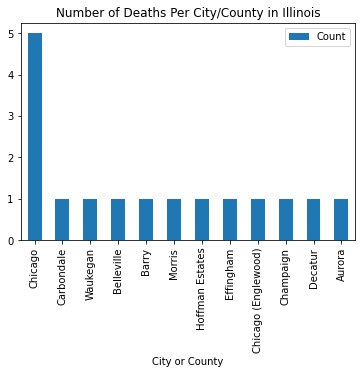

In [93]:
illinoisStateCount.plot.bar(x = 'City or County', y = 'Count', title = 'Number of Deaths Per City/County in Illinois')